In [133]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D


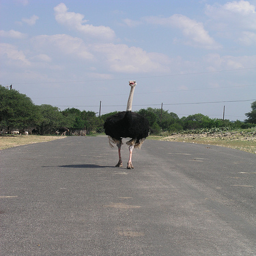

In [134]:
img1 = Image.open("images/n01518878_ostrich.JPEG")
img1 = img1.resize((256, 256))
img1

In [135]:
img1 = np.array(img1)
print(img1.shape)

(256, 256, 3)


In [136]:
img1_reshaped = img1.reshape(-1,3)
print(img1_reshaped.shape)

(65536, 3)


In [137]:
num_points = 1000

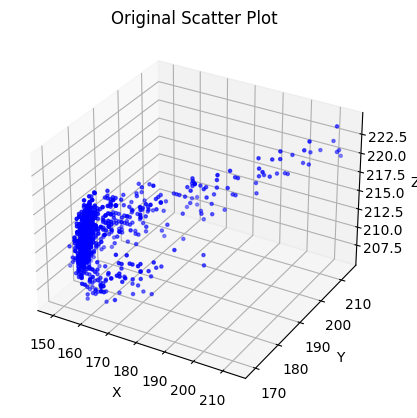

In [138]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Extract x, y, and z coordinates from the array
x = img1_reshaped[:num_points, 0]
y = img1_reshaped[:num_points, 1]
z = img1_reshaped[:num_points, 2]

# Create the scatter plot
ax.scatter(x, y, z, c='b', marker='.')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Original Scatter Plot')

# Show the plot
plt.show()

In [139]:
img1_norm = img1 / 255.0
img1_norm_reshape = img1_norm.reshape(-1,3)
print(img1_norm_reshape.shape)

(65536, 3)


In [140]:
img1_centered = img1_norm_reshape - np.mean(img1_norm_reshape, axis=0)

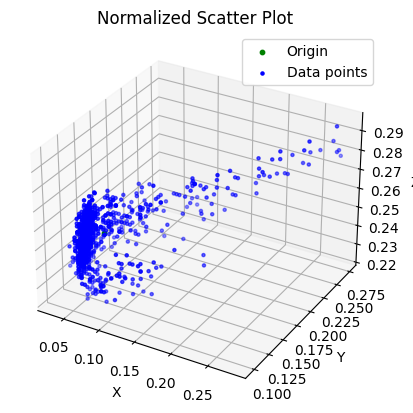

In [141]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, and z coordinates from the array
x = img1_centered[:num_points, 0]
y = img1_centered[:num_points, 1]
z = img1_centered[:num_points, 2]

# Create the scatter plot

# origin = [0,0,0]
origin = np.mean(img1_centered[:num_points,:], axis=0)
ax.scatter3D(*origin, c='g', marker='o', s=10, label='Origin')

ax.scatter(x, y, z, c='b', marker='.', label='Data points')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Normalized Scatter Plot')
ax.legend()

# Show the plot
plt.show()

In [142]:
cov_matrix = np.cov(img1_centered.T)
print(cov_matrix.shape)
cov_matrix

(3, 3)


array([[0.02238885, 0.02321543, 0.0286015 ],
       [0.02321543, 0.02526237, 0.03196917],
       [0.0286015 , 0.03196917, 0.04219773]])

In [143]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Extract the eigenvalues and eigenvectors
eigenvalues = np.real(eigenvalues)  # Ensure eigenvalues are real (sometimes they may have small imaginary parts)

indices = eigenvalues[::-1].argsort()
eigenvalues[::-1].sort()

eigenvectors = eigenvectors[:, indices]

eigenvector1 = eigenvectors[:, 0]  # First eigenvector
eigenvector2 = eigenvectors[:, 1]  # Second eigenvector
eigenvector3 = eigenvectors[:, 2]  # Third eigenvector

# Normalize the eigenvectors
eigenvector1 /= np.linalg.norm(eigenvector1)
eigenvector2 /= np.linalg.norm(eigenvector2)
eigenvector3 /= np.linalg.norm(eigenvector3)

# print(eigenvalues)


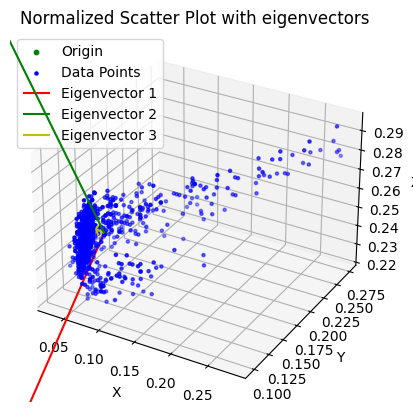

In [144]:
# Create a 3-D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the eigenvectors
# origin = [0,0,0]
ax.scatter3D(*origin, c='g', marker='o', s=10, label='Origin')
# ax.scatter3D(0,0,0, c='k', marker='o', s=10, label='Origin')

# Plot the 3-D points
x = img1_centered[:num_points, 0]
y = img1_centered[:num_points, 1]
z = img1_centered[:num_points, 2]
ax.scatter(x, y, z, c='b', marker='.', label='Data Points')

scale=200
ax.quiver(*origin, *eigenvector1 * eigenvalues[0] * scale, color='r', label='Eigenvector 1')
ax.quiver(*origin, *eigenvector2 * eigenvalues[1] * scale, color='g', label='Eigenvector 2')
ax.quiver(*origin, *eigenvector3 * eigenvalues[2] * scale, color='y', label='Eigenvector 3')


# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Normalized Scatter Plot with eigenvectors')

# Show the legend
ax.legend()

# Show the plot
plt.show()


In [145]:
img1_shifted = np.dot(img1_centered, eigenvectors)

shifted_cov_matrix = np.cov(img1_shifted.T)
print(shifted_cov_matrix.shape)

(3, 3)


In [148]:
shifted_eigenvalues, shifted_eigenvectors = np.linalg.eigh(shifted_cov_matrix)

# Extract the shifted_eigenvalues and shifted_eigenvectors
shifted_eigenvalues = np.real(shifted_eigenvalues)  # Ensure shifted_eigenvalues are real (sometimes they may have small imaginary parts)

indices = shifted_eigenvalues[::-1].argsort()
shifted_eigenvalues[::-1].sort()

shifted_eigenvectors = shifted_eigenvectors[:, indices]

shifted_eigenvector2 = shifted_eigenvectors[:, 1]  # Second eigenvector
shifted_eigenvector1 = shifted_eigenvectors[:, 0]  # First eigenvector
shifted_eigenvector3 = shifted_eigenvectors[:, 2]  # Third eigenvector

# Normalize the shifted_eigenvectors
shifted_eigenvector1 /= np.linalg.norm(shifted_eigenvector1)
shifted_eigenvector2 /= np.linalg.norm(shifted_eigenvector2)
shifted_eigenvector3 /= np.linalg.norm(shifted_eigenvector3)

# print(shifted_eigenvalues)
print(shifted_eigenvectors)

[[ 1.00000000e+00  8.12271464e-17  1.41256178e-17]
 [-8.12271464e-17  1.00000000e+00 -1.72809863e-16]
 [ 1.41256178e-17 -1.30244223e-16 -1.00000000e+00]]


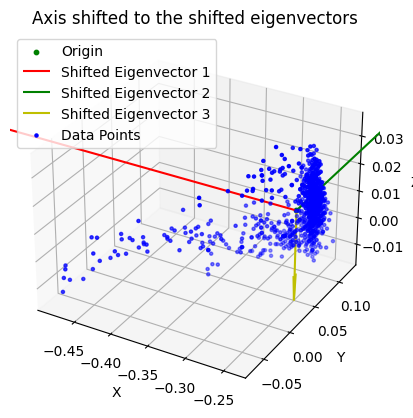

In [149]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# origin = [0,0,0]
# ax.scatter3D(0,0,0, c='k', marker='o', s=10, label='Origin')
origin = np.mean(img1_shifted[:num_points,:], axis=0)
ax.scatter3D(*origin, c='g', marker='o', s=10, label='Origin')

scale=200
ax.quiver(*origin, *shifted_eigenvector1 * shifted_eigenvalues[0] * scale, color='r', label='Shifted Eigenvector 1')
ax.quiver(*origin, *shifted_eigenvector2 * shifted_eigenvalues[1] * scale, color='g', label='Shifted Eigenvector 2')
ax.quiver(*origin, *shifted_eigenvector3 * shifted_eigenvalues[2] * scale, color='y', label='Shifted Eigenvector 3')

x = img1_shifted[:num_points, 0]
y = img1_shifted[:num_points, 1]
z = img1_shifted[:num_points, 2]
ax.scatter(x, y, z, c='b', marker='.', label='Data Points')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Axis shifted to the shifted eigenvectors')

# Show the legend
ax.legend()

# Show the plot
plt.show()

In [150]:
alpha_std = 0.1
alpha = np.random.normal(0, alpha_std)
eig_val_matrix = alpha * eigenvalues
eig_val_matrix = eig_val_matrix.reshape((3,1))

perturbation = np.matmul(eigenvectors, eig_val_matrix)
perturbation = perturbation.reshape((1,3))

In [151]:
img1_cpy = img1.copy() / 255.0
final_img = img1_cpy + perturbation

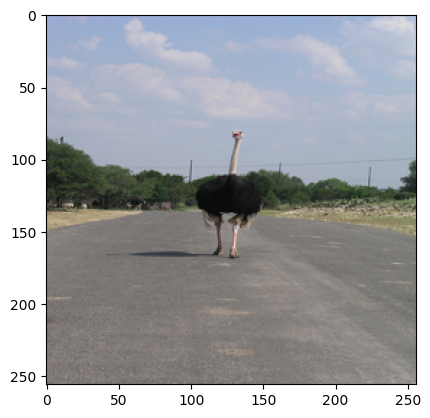

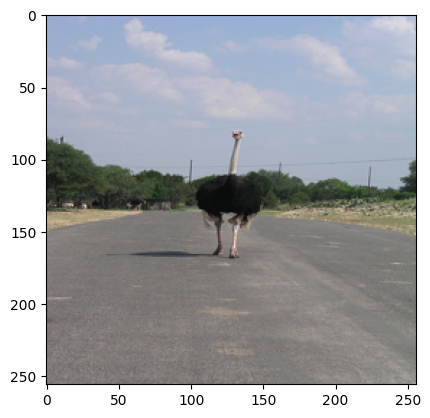

In [152]:
plt.imshow(final_img)
plt.show()

plt.imshow(img1_cpy)
plt.show()

diff = final_img - img1_cpy

In [153]:
img1_cpy = img1_cpy.reshape(-1,3)
final_img = final_img.reshape(-1,3)

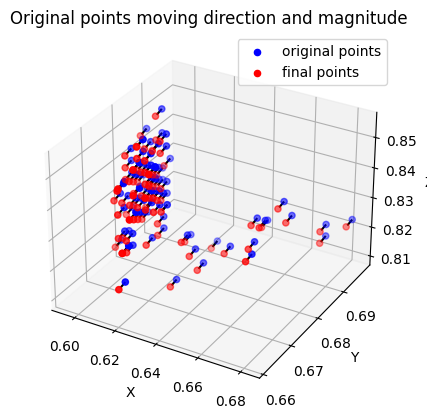

In [155]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(img1_cpy[:100, 0], img1_cpy[:100, 1], img1_cpy[:100, 2], c='b', marker='o', label='original points')
ax.scatter(final_img[:100, 0], final_img[:100, 1], final_img[:100, 2], c='r', marker='o', label='final points')

for i in range(100):
    ax.plot([img1_cpy[i, 0], final_img[i, 0]], [img1_cpy[i, 1], final_img[i, 1]], [img1_cpy[i, 2], final_img[i, 2]], 'k--')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the legend
ax.legend()
ax.set_title('Original points moving direction and magnitude')

# Show the plot
plt.show()
